#Cluster Analysis

In [ ]:
#importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from matplotlib import rcParams
import numpy as np

In [ ]:
#reading the dataset
df = pd.read_csv('dataset.csv')
df.head(3)

,Unnamed: 0,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature
0,21,Taylor Swift,Delicate,4956,2019-10-08 10:01:00,0.750,0.404,9,-10.178,0,0.0682,0.2160,0.000357,0.0911,0.0499,95.045,6NFyWDv5CjfwuzoCkw47Xf,4
1,22,Taylor Swift,Bad Blood,211933,2019-10-08 10:04:00,0.652,0.802,7,-6.114,1,0.1810,0.0871,0.000006,0.1480,0.2950,170.157,0TvQLMecTE8utzoNmvXRbK,4
2,24,Logic,1-800-273-8255,57518,2019-10-08 10:05:00,0.620,0.574,5,-7.788,0,0.0479,0.5690,0.000000,0.1900,0.3570,100.023,5tz69p7tJuGPeMGwNTxYuV,4


In [ ]:
#dropping extra columns
df = df.drop(columns=['Unnamed: 0', 'datetime', 'id'])
df.head(3) 

,artistName,trackName,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Taylor Swift,Delicate,4956,0.750,0.404,9,-10.178,0,0.0682,0.2160,0.000357,0.0911,0.0499,95.045,4
1,Taylor Swift,Bad Blood,211933,0.652,0.802,7,-6.114,1,0.1810,0.0871,0.000006,0.1480,0.2950,170.157,4
2,Logic,1-800-273-8255,57518,0.620,0.574,5,-7.788,0,0.0479,0.5690,0.000000,0.1900,0.3570,100.023,4


In [ ]:
# taking required columns
x = df[['danceability', 'energy', 'loudness',	'speechiness',	'acousticness',	'instrumentalness',	'liveness',	'valence',	'tempo'	]]

## Standardizing the variables

In [ ]:
from sklearn import preprocessing

# scale the data for better results
x_scaled = preprocessing.scale(x)

## Dimensionality Reduction

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
X_tsne = TSNE(learning_rate=100).fit_transform(x_scaled)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


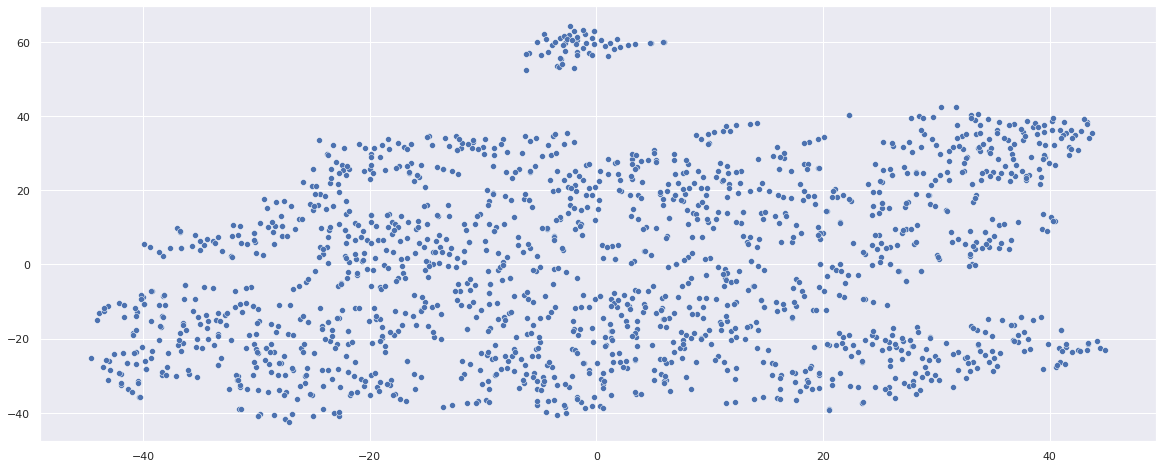

In [ ]:
rcParams['figure.figsize'] = 20,8
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1])

In [ ]:
data = pd.DataFrame({'d1': X_tsne[:, 0], 'd2': X_tsne[:, 1]})

## K-Means

In [ ]:
from sklearn.cluster import KMeans

### Elbow Method

In [ ]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[14832.0,
 12255.861081316114,
 11023.429111125923,
 9712.18903346259,
 8775.423705814006,
 7999.0424661211955,
 7496.608462273816,
 7127.979228201961,
 6822.539984327746,
 6546.802668102645]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'WCSS')

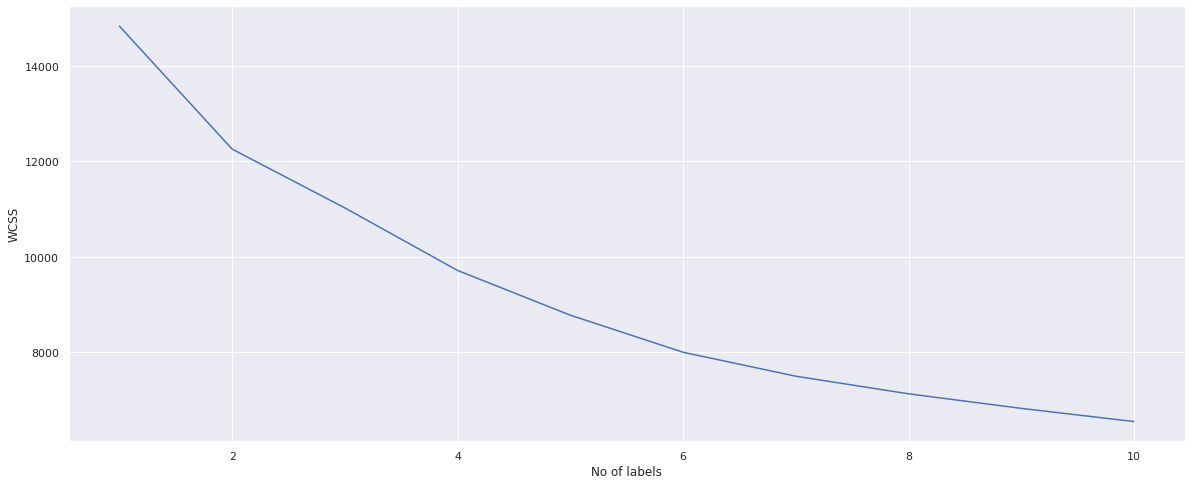

In [ ]:
sns.lineplot(range(1,11), wcss)
plt.xlabel('No of labels')
plt.ylabel('WCSS')

### Clusters

In [ ]:
kmeans_model = KMeans(6)
kmeans_model.fit(x_scaled)
data['kmeans']=kmeans_model.fit_predict(x_scaled)

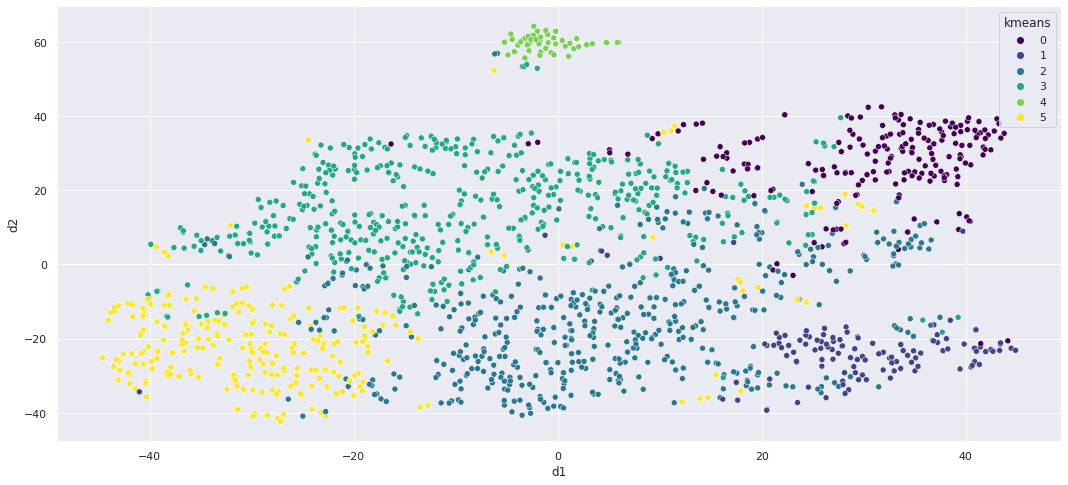

In [ ]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='kmeans', palette='viridis')

## Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
model_agg = AgglomerativeClustering(n_clusters=6)
model_agg.fit(x_scaled)
data['agg']=model_agg.fit_predict(x_scaled)

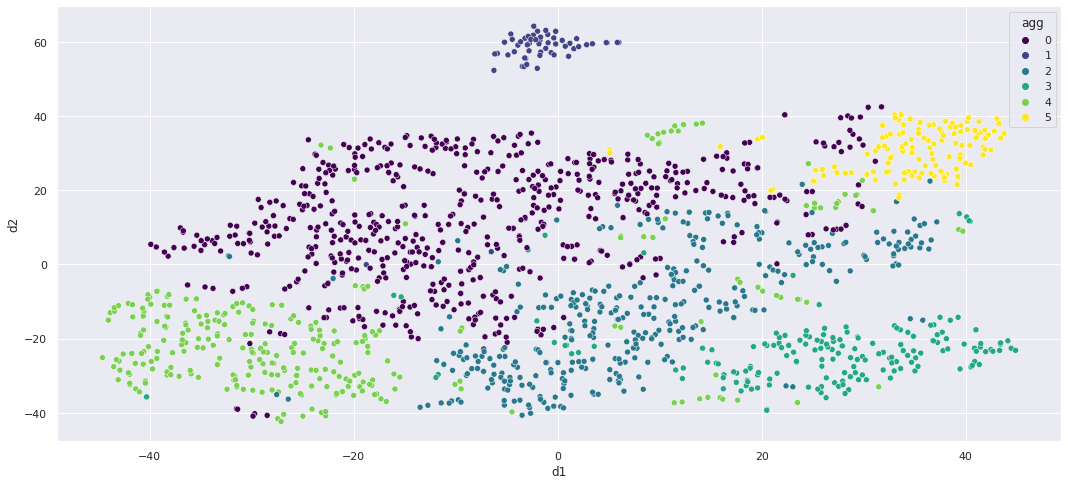

In [ ]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='agg', palette='viridis')

## Affinity Propagation Clustering

In [ ]:
from sklearn.cluster import AffinityPropagation

In [ ]:
model_ap = AffinityPropagation(damping=0.9)
model_ap.fit(x_scaled)
data['ap'] = model_ap.predict(x_scaled)

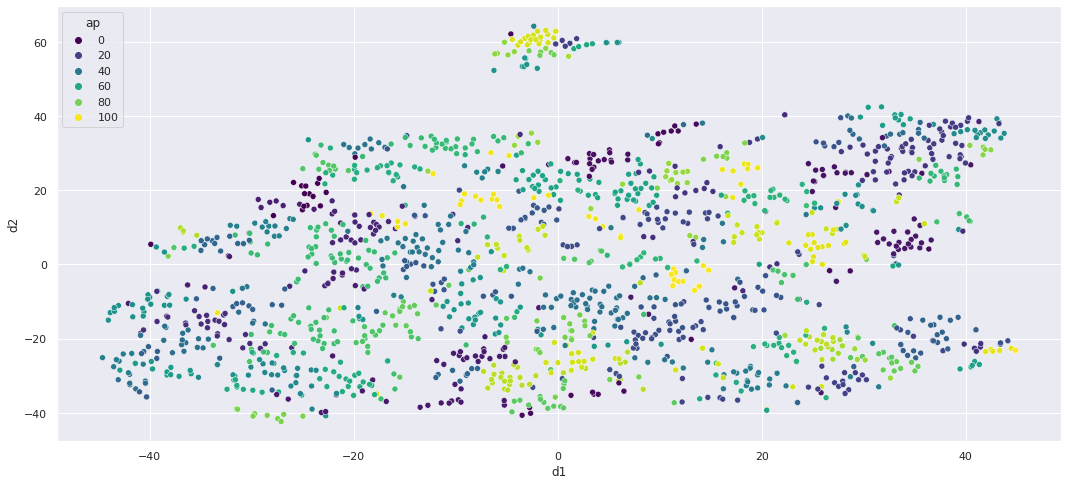

In [ ]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='ap', palette='viridis')

## BIRCH

In [ ]:
from sklearn.cluster import Birch

In [ ]:
model_birch = Birch(threshold=0.01, n_clusters=4)
model_birch.fit(x_scaled)
data['birch'] = model_birch.predict(x)

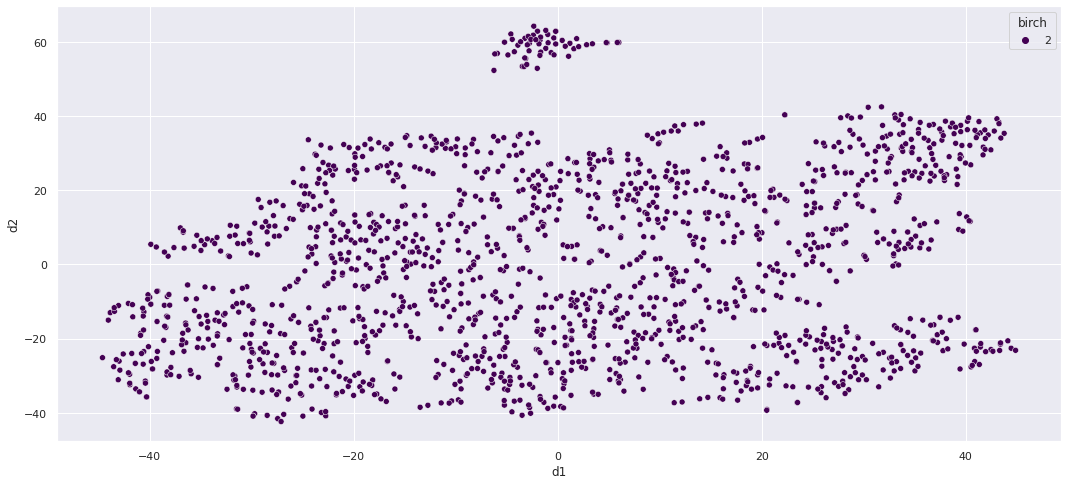

In [ ]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='birch', palette='viridis')

Which ever cluster number I am providing this algorithm is making only 1 cluster. Hence this algorithm is not performing well for our dataset.

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
model_dbscan = DBSCAN(eps=0.30, min_samples=9)
data['dbscan'] = model_dbscan.fit_predict(x)

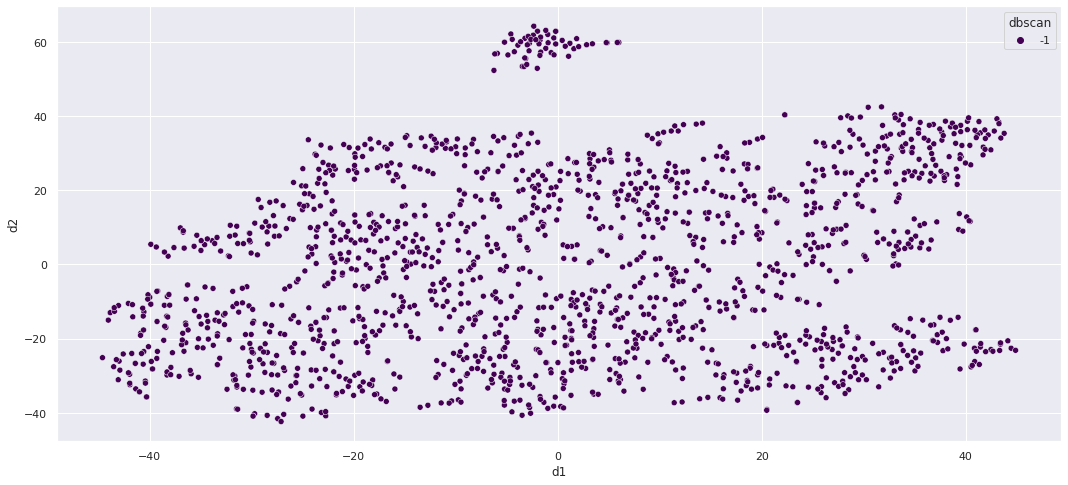

In [ ]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='dbscan', palette='viridis')

## Mini-Batch Kmeans

In [ ]:
from sklearn.cluster import MiniBatchKMeans

In [ ]:
model_minibatch_kmeans = MiniBatchKMeans(n_clusters=6)
model_minibatch_kmeans.fit(x_scaled)
data['minibatch_kmeans'] = model_minibatch_kmeans.predict(x)

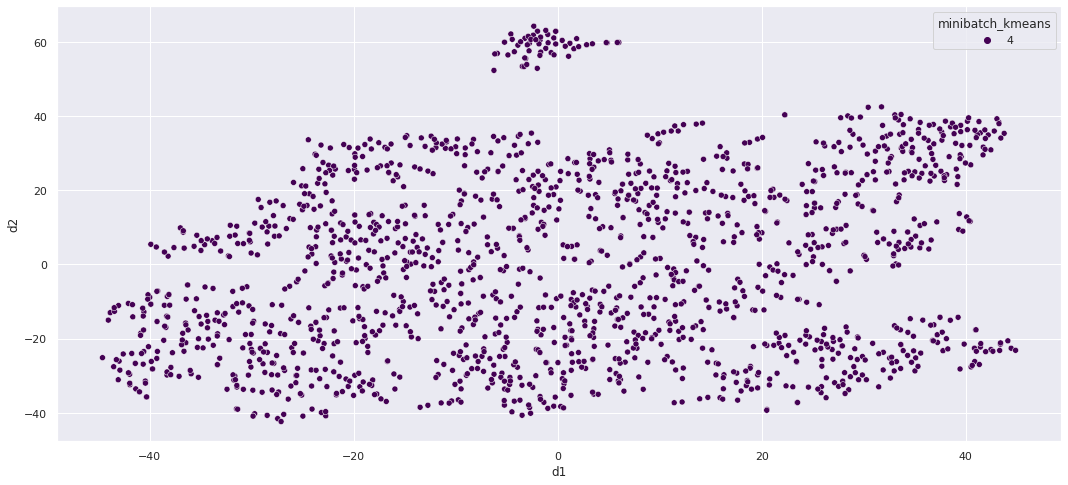

In [ ]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='minibatch_kmeans', palette='viridis')

In [ ]:
x= x.join(data['agg'])
x.head(3)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,agg
0,0.750,0.404,-10.178,0.0682,0.2160,0.000357,0.0911,0.0499,95.045,0
1,0.652,0.802,-6.114,0.1810,0.0871,0.000006,0.1480,0.2950,170.157,0
2,0.620,0.574,-7.788,0.0479,0.5690,0.000000,0.1900,0.3570,100.023,4


In [ ]:
average = x.groupby('agg').mean().reset_index()
average

,agg,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,0.590544,0.722662,-5.364866,0.061362,0.130816,0.002814,0.138390,0.392142,124.462670
1,1,0.632596,0.683193,-8.392807,0.058577,0.186104,0.654123,0.141656,0.366567,122.470316
2,2,0.749000,0.694788,-5.464843,0.063453,0.167602,0.001496,0.116219,0.680614,116.099959
3,3,0.690725,0.698843,-6.062438,0.258129,0.194297,0.002823,0.131346,0.553219,127.860112
4,4,0.673125,0.753410,-5.155643,0.076024,0.122194,0.001931,0.365466,0.542672,115.858030
5,5,0.543614,0.386927,-9.254299,0.042809,0.720378,0.007047,0.117166,0.355238,107.991071


In [ ]:
df = df.join(data['agg'])

###Cluster Profile

###Cluster )

**Features**

danceability | energy
--- | ---
0.59	| 0.72

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.06	| 0.13	| 0.002

loudness | liveness
--- | ---
-5.36 | 0.14

valence	| tempo
--- | ---
0.39 | 124.5

**Description**  
As per the features, cluster 0 contains energetic songs with more of beats (mediocre beats/minute) and less of acouticness and instrumentalness. Moreover, these songs have a little sad and gloomy lyrics. *(Beats + Gloomy)*

Few of the songs in this cluster are as follows:


In [ ]:
cluster_0 = df.loc[ df['agg'] == 0, ['artistName', 'trackName']]
cluster_0.sample(5)

,artistName,trackName
146,Time Is Yours,My Youth
282,Dash Berlin,Shelter (Mix Cut) - Yoel Lewis Remix
1622,Alesso,TIME
1102,Madison Beer,Dear Society
725,Martin Jensen,Miracles


###Cluster 1

**Features**

danceability | energy
--- | ---
0.63	| 0.68

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.05	| 0.18	| 0.65

loudness | liveness
--- | ---
-8.39 | 0.14

valence	| tempo
--- | ---
0.36 | 122.5

**Description**  
As per the features, cluster 1 contains energetic songs with more of beats (mediocre beats/minute) and less of acouticness and speechiness. Moreover, these songs have a little sad and gloomy lyrics. *(Beats + Gloomy)*

However, the only difference with cluster 0 is the instrumentalness. Along with beats and energy the song have lot of instrument sounds.

Few of the songs in this cluster are as follows:


In [ ]:
cluster_1 = df.loc[ df['agg'] == 1, ['artistName', 'trackName']]
cluster_1.sample(5)

,artistName,trackName
427,Carly Rae Jepsen,Run Away With Me - Cyril Hahn Remix
709,Jawsh 685,Laxed - Siren Beat
832,Jody Wisternoff,Nightwhisper
800,Unknown Artist,Unknown Track
1645,Rak-Su,Princess Peach


In [ ]:
cluster_2 = df.loc[ df['agg'] == 2, ['artistName', 'trackName']]
cluster_2.sample(5)

,artistName,trackName
337,Akhil,Kalla Sohna Nai
182,Alwi,Azurita
1425,Ciara,Thinkin Bout You
846,Marshmello,Proud
1153,Fifth Harmony,I'm In Love With a Monster


In [ ]:
cluster_3 = df.loc[ df['agg'] == 3, ['artistName', 'trackName']]
cluster_3.sample(5)

,artistName,trackName
1578,BLACKPINK,Ice Cream (with Selena Gomez)
399,Demi Lovato,Sorry Not Sorry
1559,5 Seconds of Summer,Easier
1009,Iggy Azalea,Kawasaki
79,Marshmello,Roll The Dice


In [ ]:
cluster_4 = df.loc[ df['agg'] == 4, ['artistName', 'trackName']]
cluster_4.sample(5)

,artistName,trackName
756,Maroon 5,Moves Like Jagger
346,Jake Miller,Palm Blvd
1079,P!nk,Can We Pretend (feat. Cash Cash) - Sigala Remix
1301,Keanu Silva,We Are The Greatest
1376,Dan + Shay,Tequila


In [ ]:
cluster_5 = df.loc[ df['agg'] == 5, ['artistName', 'trackName']]
cluster_5.sample(5)

,artistName,trackName
249,A Year on Earth,Where Do I Go from Here?
868,Great Good Fine Ok,Change
204,BRKLYN,Steal Your Heart - Unplugged Version
22,Boyce Avenue,You're Beautiful
215,The Local Train,Aaftaab
